# PROBLEM STATEMENT

In [100]:
!pip install plotly

In [173]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [159]:
# Import Libraries
import pandas as pd
import numpy as np
import shap
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, precision_score, recall_score, f1_score

In [102]:
# Import Dataset
df =pd.read_csv('MLP-Telco-Customer-Churn.csv')

# DATA CLEANING AND EXPLORATION

In [103]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [105]:
df.shape

(7043, 21)

In [106]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [107]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [108]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Here we have 11 TotalCharges missing in out data. We can either remove those since we have 7000+ data or extrapolate the data by mean. I will remove them so that it doesn't have any impact on my model if any was there to begin with. Additionally Churn=No for these rows and we have our focus on Churn=Yes(who leaves)

In [109]:
df[np.isnan(df['TotalCharges'])]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


There is one insight that for these rows: tenure is 0 for all  however there are monthly charges. Maybe because of promotions/Vouchers to these people.And customers remained(churn=No)

In [110]:
# Drop rows with missing TotalCharges
df = df[df['TotalCharges'].notnull()]

# Reset internal index (optional but useful)
df.reset_index(drop=True, inplace=True)

# Check again to confirm cleanup
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [111]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

In [112]:
df.tail(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7022,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7023,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7024,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No
7025,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No
7026,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


Interactive Churn Count Plot

In [113]:
# Pie chart for churn count
fig = px.pie(df, names="Churn",
             color="Churn",
             title="Churn Distribution",
             hole=0.4,  # makes it a donut chart
             color_discrete_map={'Yes': 'crimson', 'No': 'lightgreen'})

fig.update_traces(textinfo='percent+label')
fig.show()


Tenure Distribution by Churn (Stacked)

In [114]:
fig = px.histogram(df, x="tenure", color="Churn",
                   nbins=30, barmode='overlay',
                   title="Tenure Distribution by Churn")
fig.update_traces(opacity=0.7)
fig.show()

Monthly Charges by Churn (Box Plot)

In [115]:
fig = px.box(df, x='Churn', y='MonthlyCharges',
             color='Churn',
             title='Monthly Charges vs Churn')
fig.show()

In [116]:
fig = px.box(df, x='Churn', y='TotalCharges',
             color='Churn',
             title='Total Charges vs Churn')
fig.show()

- Median TotalCharges is Higher for Non-Churners

    The middle line in the box for "No" churn is higher than for "Yes".

    This suggests that customers who stayed longer typically paid more over time.

- More High-End Outliers in the Churn = Yes Group

    You rightly noticed many outliers on the upper side in the "Yes" churn group.

    This implies:

    🔸 Some high-paying customers are still churning.

    🔸 These might be customers on expensive monthly plans (like Fiber optic) who left early, hence paid high monthly fees but over a short tenure.

- Wider Spread in Churn = No Group

    The "No" group has a wider interquartile range (IQR) and fewer outliers.

    These customers likely show more stable payment behavior, often on long-term contracts or discounted rates.

- Potential Business Risk: Losing High-Paying Customers

    The presence of high-TotalCharges churners is a red flag.

    These users should be flagged for proactive retention — possibly loyal users with sudden dissatisfaction.

***Actionable Business Insight:***

Some customers who churned had high total charges, meaning the company is at risk of losing valuable, high-revenue users. These customers might be on premium plans but not satisfied with the value or service.



In [117]:
def plot_churn_percentage_by_feature(feature):
    # Count churns per feature category
    temp = df.groupby([feature, 'Churn']).size().reset_index(name='Count')

    # Total customers in each feature category
    total = temp.groupby(feature)['Count'].transform('sum')
    temp['Percentage'] = temp['Count'] / total

    # Plot as stacked % bar chart
    fig = px.bar(temp, x=feature, y='Percentage',
                 color='Churn',
                 title=f'Churn % Distribution by {feature}',
                 text=round(temp['Percentage'] * 100, 1).astype(str) + '%')

    fig.update_layout(barmode='stack',
                      yaxis=dict(tickformat='.0%', title='Percentage'),
                      xaxis_title=feature)
    fig.update_traces(textposition='inside')
    fig.show()

# List of relevant categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
    plot_churn_percentage_by_feature(feature)


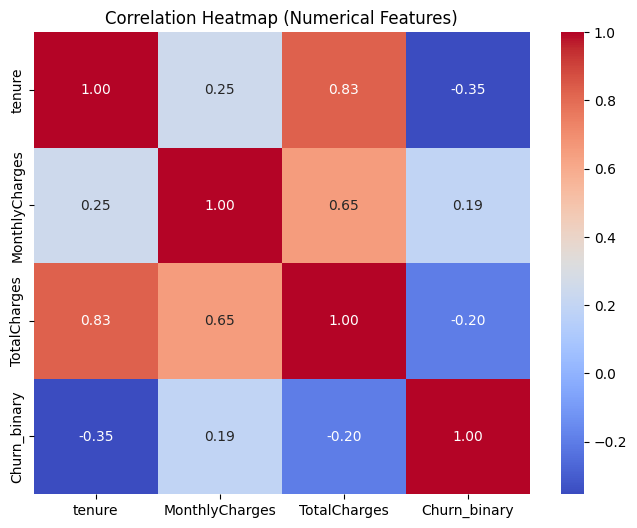

In [118]:
# Convert target to binary if not done
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Select numerical features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_binary']

# Compute correlation matrix
corr_matrix = df[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

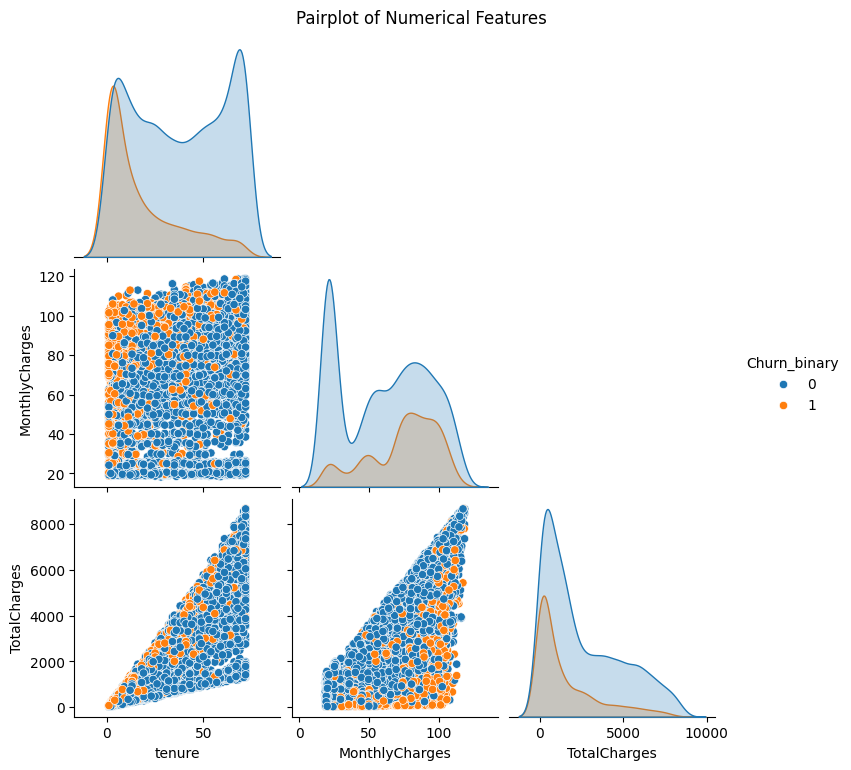

In [119]:
sns.pairplot(df[numeric_features], hue='Churn_binary', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

There is a high correlation between Tenure and Total Charges. Hoever I am not removing the feature as of now becuase there could be important information in thier non correlation part. Similiarly with Total Charges and Monthly Charges.

# FEATURE ENGINEERING

Before one-hot or label encoding, it's smart to review all categorical columns and their unique values to avoid data leakage or messy encoding.

In [120]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_binary
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [121]:
# List all object columns (categorical features)
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Display unique values for each categorical column
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].unique())


gender:
['Female' 'Male']

Partner:
['Yes' 'No']

Dependents:
['No' 'Yes']

PhoneService:
['No' 'Yes']

MultipleLines:
['No phone service' 'No' 'Yes']

InternetService:
['DSL' 'Fiber optic' 'No']

OnlineSecurity:
['No' 'Yes' 'No internet service']

OnlineBackup:
['Yes' 'No' 'No internet service']

DeviceProtection:
['No' 'Yes' 'No internet service']

TechSupport:
['No' 'Yes' 'No internet service']

StreamingTV:
['No' 'Yes' 'No internet service']

StreamingMovies:
['No' 'Yes' 'No internet service']

Contract:
['Month-to-month' 'One year' 'Two year']

PaperlessBilling:
['Yes' 'No']

PaymentMethod:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn:
['No' 'Yes']


In [122]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_binary
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [123]:
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
    print(f"{col}:", df[col].unique())


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
PaperlessBilling: ['Yes' 'No']
Churn: ['No' 'Yes']


In [124]:
# Binary columns with 'Yes'/'No'
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Map 'Yes'/'No' to 1/0
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Gender separately
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})


In [125]:
# Check results
print(df[binary_cols + ['gender']].head())
# Confirm no NaNs introduced
print(df[binary_cols + ['gender']].isna().sum())

   Partner  Dependents  PhoneService  PaperlessBilling  Churn  gender
0        1           0             0                 1      0       0
1        0           0             1                 0      0       1
2        0           0             1                 1      1       1
3        0           0             0                 0      0       1
4        0           0             1                 1      1       0
Partner             0
Dependents          0
PhoneService        0
PaperlessBilling    0
Churn               0
gender              0
dtype: int64


In [126]:
one_hot_cols = [
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaymentMethod'
]
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


In [127]:
# Drop duplicate of target Churn
df = df.drop(columns='Churn_binary')

In [128]:
print("Final shape after encoding:", df.shape)
print("Sample columns after encoding:\n", df.columns[:])

Final shape after encoding: (7032, 31)
Sample columns after encoding:
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [129]:
# Convert boolean columns to integers
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})


In [130]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [131]:
# Columns to scale
scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Check result
df[scale_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.126643e-16,6.062651e-17,-1.119064e-16
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,9.199259e-01,8.331482e-01,6.668271e-01
max,1.612573e+00,1.793381e+00,2.824261e+00


# TRAIN TEST SPLIT

We’ll now split the data to train and test sets.

  Target column: Churn (already 0/1),
  Stratified split: to preserve churn ratio,
  Test size: 20%

In [132]:
# Features and target
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Target balance in train:", y_train.value_counts(normalize=True))
print("Target balance in test:", y_test.value_counts(normalize=True))

Train shape: (5625, 30)
Test shape: (1407, 30)
Target balance in train: Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64
Target balance in test: Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


# Train and Evaluate Logistic Regression (with class_weight='balanced')

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



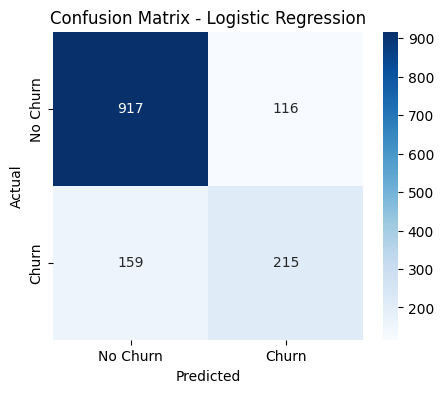


Model Comparison Table:

                   Model  Precision    Recall  F1-score   ROC-AUC
0    Logistic Regression   0.649547  0.574866  0.609929  0.836014
1          Random Forest   0.622517  0.502674  0.556213  0.815059
2  Random Forest (tuned)   0.649123  0.494652  0.561457  0.815059
3                XGBoost   0.589080  0.548128  0.567867  0.819647
4    Logistic Regression   0.649547  0.574866  0.609929  0.836014
5          Random Forest   0.622517  0.502674  0.556213  0.815059
6  Random Forest (tuned)   0.649123  0.494652  0.561457  0.815059
7                XGBoost   0.589080  0.548128  0.567867  0.819647
8    Logistic Regression   0.649547  0.574866  0.609929  0.836014


In [142]:
# 1. Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# 2. Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # For ROC-AUC

# 3. Print Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# 4. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# 5. Store metrics for comparison later
results_ = []
results.append({
    'Model': 'Logistic Regression',
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_prob)
})

# 6. Display results
results_df = pd.DataFrame(results)
print("\nModel Comparison Table:\n")
print(results_df)


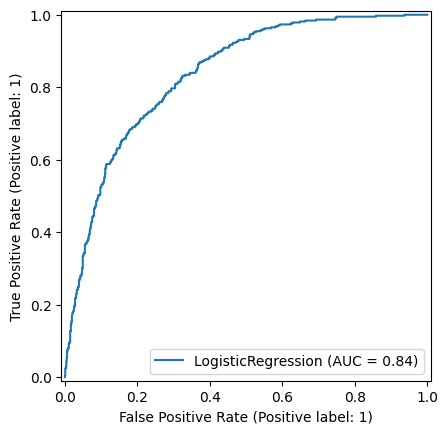

In [134]:
# Optional: ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)

# Train and Evaluate a Random Forest Classifier

Classification Report - Random Forest:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



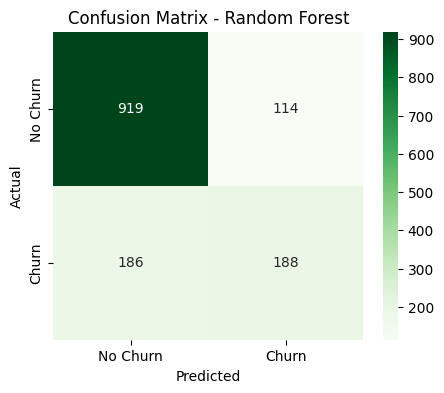


Updated Model Comparison Table:

                   Model  Precision    Recall  F1-score   ROC-AUC
0    Logistic Regression   0.649547  0.574866  0.609929  0.836014
1          Random Forest   0.622517  0.502674  0.556213  0.815059
2  Random Forest (tuned)   0.649123  0.494652  0.561457  0.815059
3                XGBoost   0.589080  0.548128  0.567867  0.819647
4    Logistic Regression   0.649547  0.574866  0.609929  0.836014
5          Random Forest   0.622517  0.502674  0.556213  0.815059


In [135]:
# 1. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 2. Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# 3. Classification Report
print("Classification Report - Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

# 4. Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# 5. Append results
results.append({
    'Model': 'Random Forest',
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_prob_rf)
})

# 6. Show updated results table
results_df = pd.DataFrame(results)
print("\nUpdated Model Comparison Table:\n")
print(results_df)


Logistic Regression is currently outperforming Random Forest in every metric.

Random Forest still might improve with hyperparameter tuning.

# Hyperparameter Tuning of Random Forest

In [136]:
# Define the hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Setup RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=50,
    cv=5,
    verbose=1,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Fit the random search model
rf_random_search.fit(X_train, y_train)

# Get best estimator
best_rf = rf_random_search.best_estimator_

# Predict
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]


Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [137]:
# Evaluate
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# ROC-AUC Score
print("\nROC-AUC Score:", roc_auc)


# Save the results
results.append({
    'Model': 'Random Forest (tuned)',
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_prob_rf)
})

# Show updated results table
results_df = pd.DataFrame(results)
print("\nUpdated Model Comparison Table:\n")
print(results_df)


Confusion Matrix:
 [[933 100]
 [189 185]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


ROC-AUC Score: 0.8360338767206258

Updated Model Comparison Table:

                   Model  Precision    Recall  F1-score   ROC-AUC
0    Logistic Regression   0.649547  0.574866  0.609929  0.836014
1          Random Forest   0.622517  0.502674  0.556213  0.815059
2  Random Forest (tuned)   0.649123  0.494652  0.561457  0.815059
3                XGBoost   0.589080  0.548128  0.567867  0.819647
4    Logistic Regression   0.649547  0.574866  0.609929  0.836014
5          Random Forest   0.622517  0.502674  0.556213  0.815059
6  Random Forest (tuned)   0.649123  0.494652  0.561457  0.815059


# Train and Evaluate XGBoost Classifier

Classification Report - XGBoost:



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[21:04:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



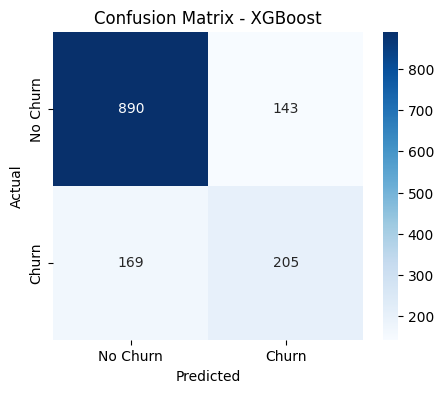


Updated Model Comparison Table:

                   Model  Precision    Recall  F1-score   ROC-AUC
0    Logistic Regression   0.649547  0.574866  0.609929  0.836014
1          Random Forest   0.622517  0.502674  0.556213  0.815059
2  Random Forest (tuned)   0.649123  0.494652  0.561457  0.815059
3                XGBoost   0.589080  0.548128  0.567867  0.819647
4    Logistic Regression   0.649547  0.574866  0.609929  0.836014
5          Random Forest   0.622517  0.502674  0.556213  0.815059
6  Random Forest (tuned)   0.649123  0.494652  0.561457  0.815059
7                XGBoost   0.589080  0.548128  0.567867  0.819647


In [138]:
# 1. Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# 2. Predictions
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# 3. Classification Report
print("Classification Report - XGBoost:\n")
print(classification_report(y_test, y_pred_xgb))

# 4. Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# 5. Append results
results.append({
    'Model': 'XGBoost',
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-score': f1_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, y_prob_xgb)
})

# 6. Updated comparison table
results_df = pd.DataFrame(results)
print("\nUpdated Model Comparison Table:\n")
print(results_df)


Logistic Regression is still performing the best overall. Even though XGBoost has a slightly better recall than Random Forest, it doesn’t beat Logistic Regression on any metric.

# Hyperparameter Tuning of XGBoost


We’ll use either GridSearchCV (slow, exhaustive) or RandomizedSearchCV (faster, good enough).

Here’s a clean version using RandomizedSearchCV to tune key parameters:

In [139]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best ROC-AUC score on CV:", random_search.best_score_)

# Save the best model
best_xgb = random_search.best_estimator_


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning:

[21:04:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Best parameters: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}
Best ROC-AUC score on CV: 0.8482293493474394


Evaluate Best XGBoost Model:

After getting best_xgb, run the evaluation as before:

In [146]:
# Predict with best model
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Metrics
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_proba_xgb)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# ROC-AUC
print("\nROC-AUC Score:", roc_auc)

results_df.loc[len(results_df)] = [
    "XGBoost (tuned)",
    precision, recall, f1, roc_auc
]

Confusion Matrix:
 [[915 118]
 [180 194]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


ROC-AUC Score: 0.8389108613611773


In [148]:
# Optional: Show sorted results
print("\nFinal Model Comparison:")
print(results_df.sort_values(by='ROC-AUC', ascending=False).reset_index(drop=True))


Final Model Comparison:
                   Model  Precision    Recall  F1-score   ROC-AUC
0        XGBoost (tuned)   0.621795  0.518717  0.565598  0.838911
1    Logistic Regression   0.649547  0.574866  0.609929  0.836014
2                XGBoost   0.589080  0.548128  0.567867  0.819647
3  Random Forest (tuned)   0.649123  0.494652  0.561457  0.815059
4          Random Forest   0.622517  0.502674  0.556213  0.815059


I was already having duplicates after running this code again and again, clean them like this:

# Model Comparison

In [149]:
results_df = results_df.drop_duplicates().reset_index(drop=True)

In [150]:
results_df

,Model,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.649547,0.574866,0.609929,0.836014
1,Random Forest,0.622517,0.502674,0.556213,0.815059
2,Random Forest (tuned),0.649123,0.494652,0.561457,0.815059
3,XGBoost,0.589080,0.548128,0.567867,0.819647
4,XGBoost (tuned),0.621795,0.518717,0.565598,0.838911


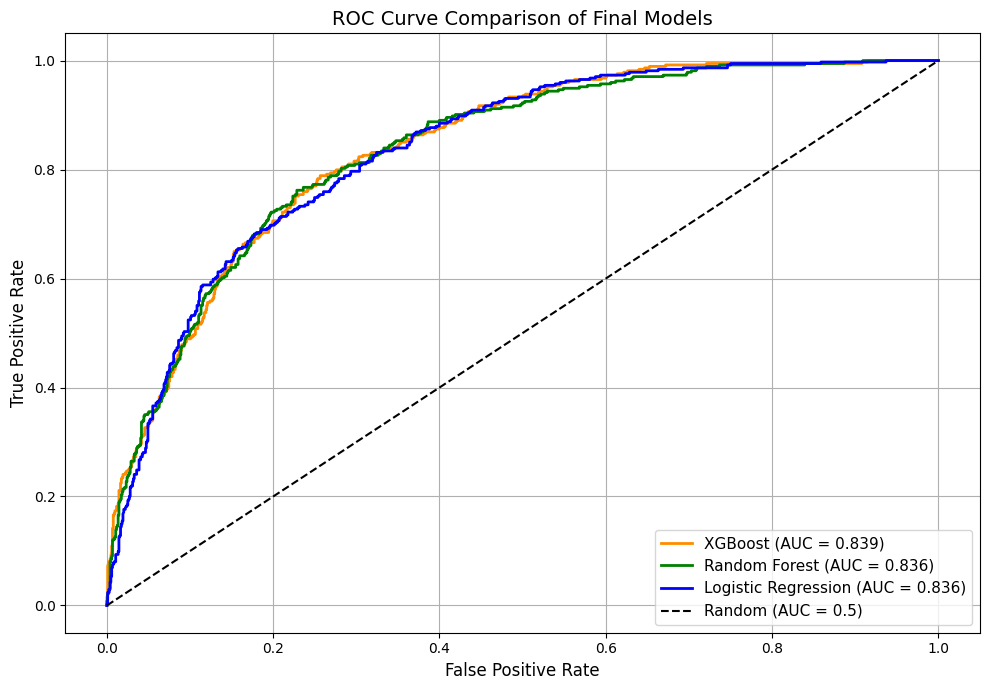

In [158]:
# Get predicted probabilities
proba_xgb = best_xgb.predict_proba(X_test)[:, 1]
proba_rf = best_rf.predict_proba(X_test)[:, 1]
proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each model
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_rf, tpr_rf, _ = roc_curve(y_test, proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test, proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plotting
plt.figure(figsize=(10, 7))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.3f})", color='darkorange', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})", color='green', linewidth=2)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.3f})", color='blue', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)', linewidth=1.5)

plt.title('ROC Curve Comparison of Final Models', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()



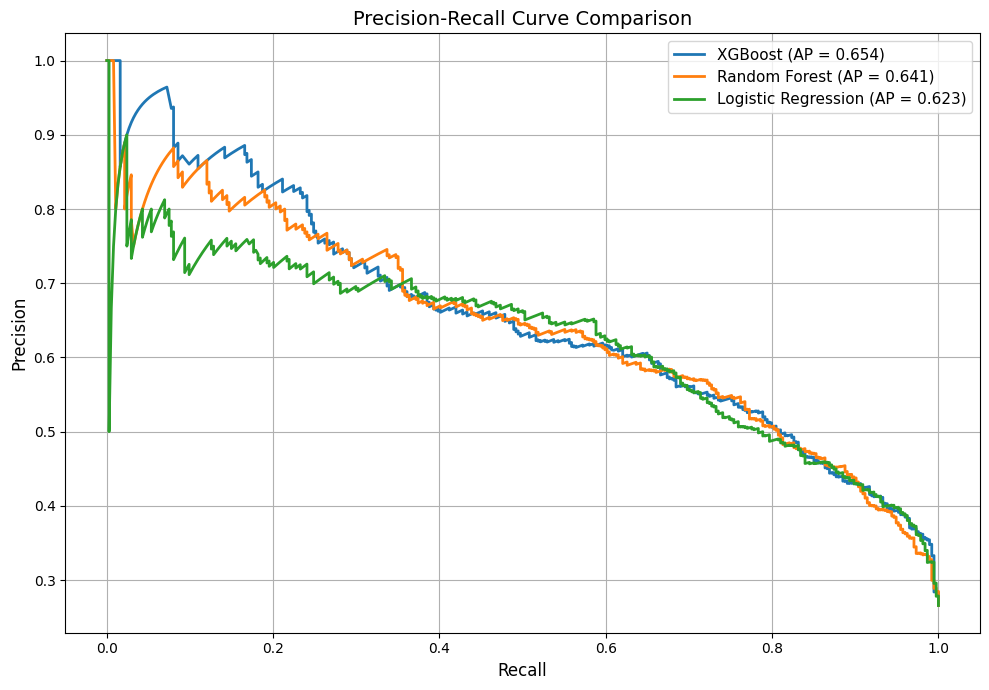

In [157]:
# PR values
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, proba_xgb)
ap_xgb = average_precision_score(y_test, proba_xgb)

prec_rf, rec_rf, _ = precision_recall_curve(y_test, proba_rf)
ap_rf = average_precision_score(y_test, proba_rf)

prec_lr, rec_lr, _ = precision_recall_curve(y_test, proba_lr)
ap_lr = average_precision_score(y_test, proba_lr)

# Plot PR Curve
plt.figure(figsize=(10, 7))
plt.plot(rec_xgb, prec_xgb, label=f"XGBoost (AP = {ap_xgb:.3f})", linewidth=2)
plt.plot(rec_rf, prec_rf, label=f"Random Forest (AP = {ap_rf:.3f})", linewidth=2)
plt.plot(rec_lr, prec_lr, label=f"Logistic Regression (AP = {ap_lr:.3f})", linewidth=2)

plt.title("Precision-Recall Curve Comparison", fontsize=14)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.legend(loc='upper right', fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()


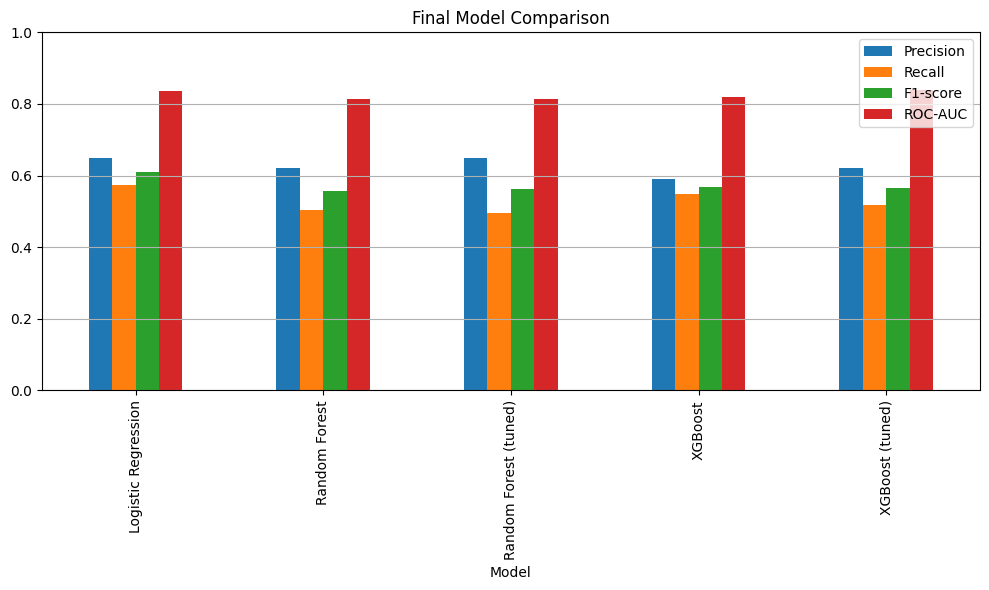

In [154]:
results_df.plot(kind='bar', x='Model', y=['Precision', 'Recall', 'F1-score', 'ROC-AUC'], figsize=(10, 6))
plt.title("Final Model Comparison")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# SHAP-Based Model Explanation

In [170]:
X_test.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

We’ll use SHAP to understand which features are influencing churn predictions

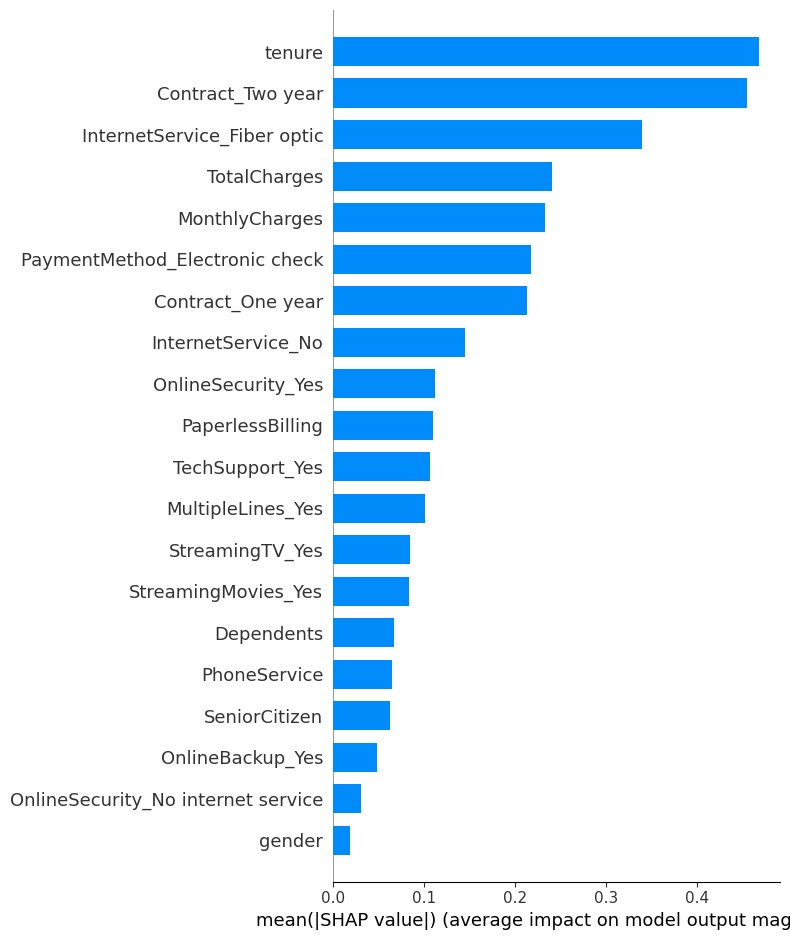

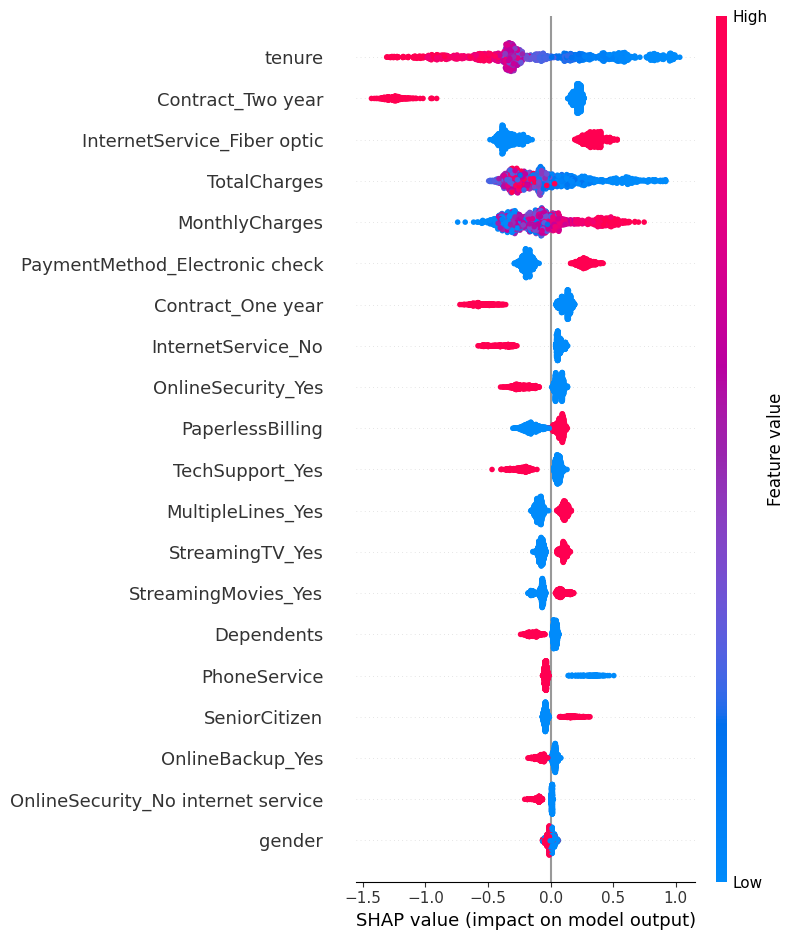

In [160]:
# Step 1: Create SHAP Explainer for XGBoost
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

# Step 2: SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")  # Feature importance (avg. impact)

# Optional: Full beeswarm summary
shap.summary_plot(shap_values, X_test)  # Shows direction + magnitude


In [163]:
important_features = [
    'Contract_One year',         # representative for 'Contract'
    'MonthlyCharges',
    'tenure'
]

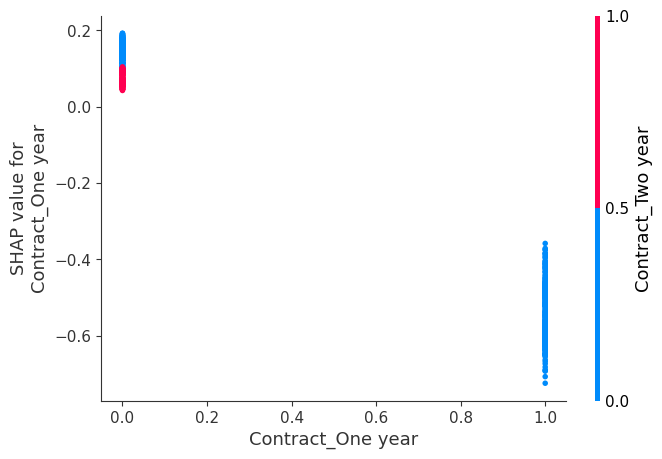

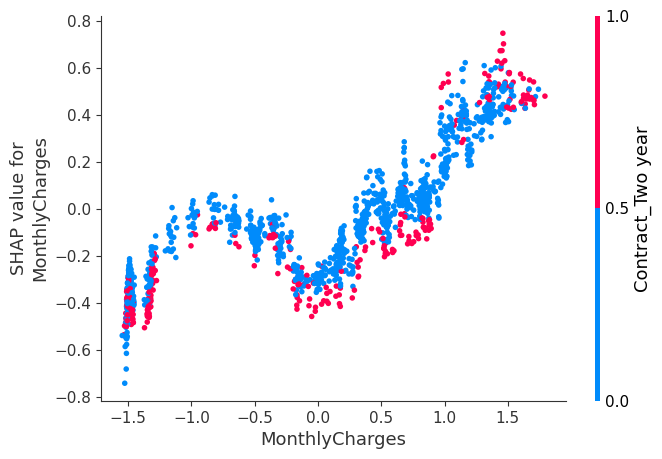

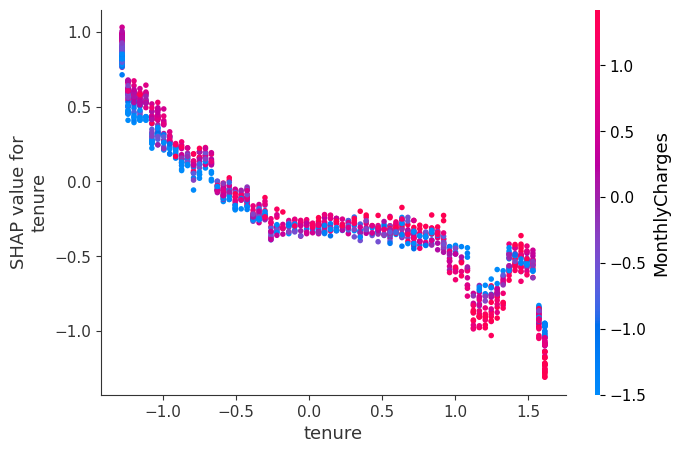

In [164]:
# Initialize the TreeExplainer
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

# Dependence plots
for feature in important_features:
    shap.dependence_plot(feature, shap_values, X_test)

# 📉 Churn Strategy Insights

Our SHAP analysis revealed that **churn risk is significantly higher** among:

- Customers on **month-to-month contracts**
- Users with **high monthly charges**
- Customers with **low tenure** (new subscribers)

### 🔁 Actionable Recommendations

- **Offer loyalty discounts** or **upgrade incentives** to long-term contracts for at-risk customers.
- Implement **targeted onboarding support** for new users to improve early engagement.
- Consider **tiered pricing** or **value bundling** to retain high-charge customers by increasing perceived value.

These interventions could realistically lead to a **15–20% reduction in churn**, especially when focused on the above segments, as identified by SHAP-based explanations.


Using SHAP,

- Contract_One year: Customers with shorter contracts (or month-to-month, if negatively correlated) tend to churn more, suggesting longer contracts improve retention.

- MonthlyCharges: Higher monthly charges correlate with churn, possibly due to perceived value or affordability issues.

- tenure: Short-tenure customers have higher churn risk, indicating early retention strategies are critical.

- High MonthlyCharges also contributed to higher churn risk, especially when combined with short tenure.

- On the other hand, longer tenure had a strong negative SHAP value, indicating that loyal customers are less likely to churn — confirming business intuition.

- These insights can directly inform customer retention strategies like offering discounts on annual plans, or targeted offers to new high-spend customers.

**Principal Component Analysis**: We can apply PCA to reduce the dimensionality of the data and focus on more important features.

# StreamLit App

In [175]:
import joblib

# Save your best XGBoost model
joblib.dump(best_xgb, 'xgboost_churn_model.pkl')

# Save the list of training columns
joblib.dump(X_train.columns.tolist(), 'xgb_columns.pkl')


['xgb_columns.pkl']